In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
import sys
import os
from contextlib import redirect_stdout
import io

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import mesh
import geometry
import material
from stress_strain_analysis import stress_strain_analysis

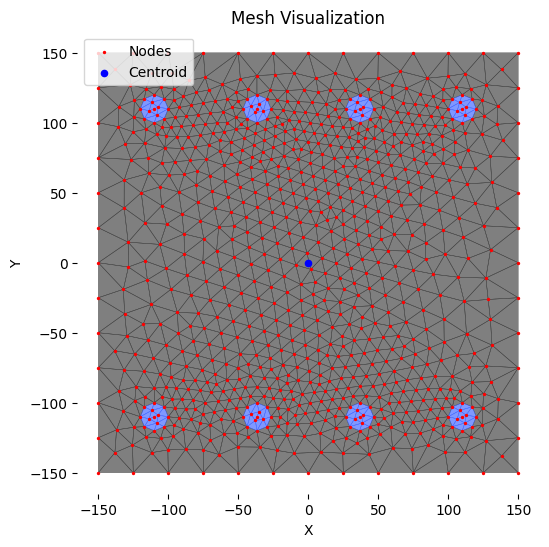

In [2]:
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 20,
                                                       rebar_spacing  = 50)
Mesh = mesh.Mesh(ReinforcedConcrete, "triangle", 25)
Mesh.plot()

In [3]:
Analysis = stress_strain_analysis(Mesh, Nx=0, My=100)

[5, 5, 10, 10, 15, 15, 20, 20, 25, 25, 30, 30, 35, 35, 40, 40, 45, 45, 50, 50]
 The best solution found:                                                                           
 [-9.91673808e-04 -9.70492839e-05  9.17806409e-05]

 Objective function:
 1063.6859558836636


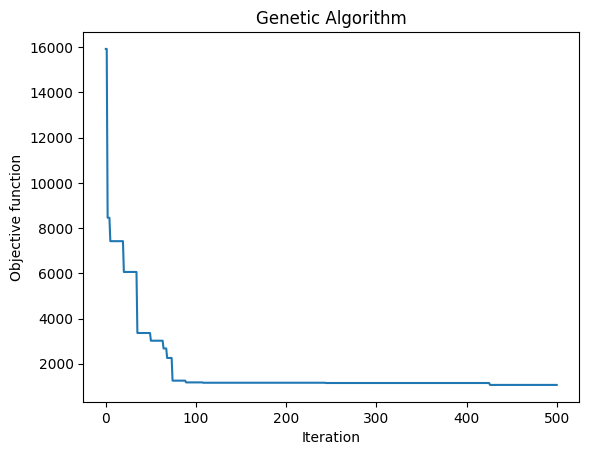

 The best solution found:                                                                           
 [-9.88023376e-04 -9.93490284e-05  9.26672850e-05]

 Objective function:
 999.7503568508657


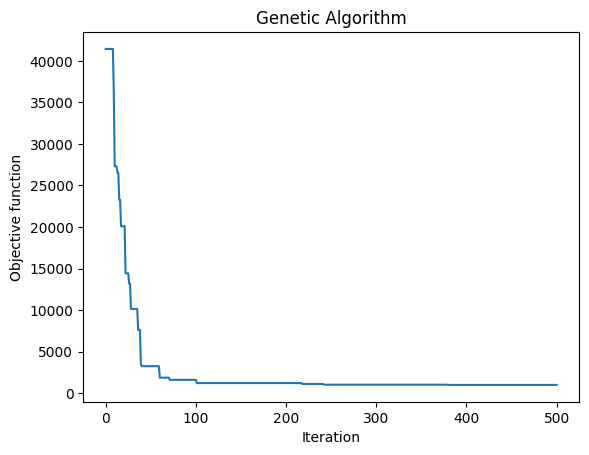

 The best solution found:                                                                           
 [-9.98554306e-04  9.26533480e-05 -8.50765857e-05]

 Objective function:
 973.4408145702037


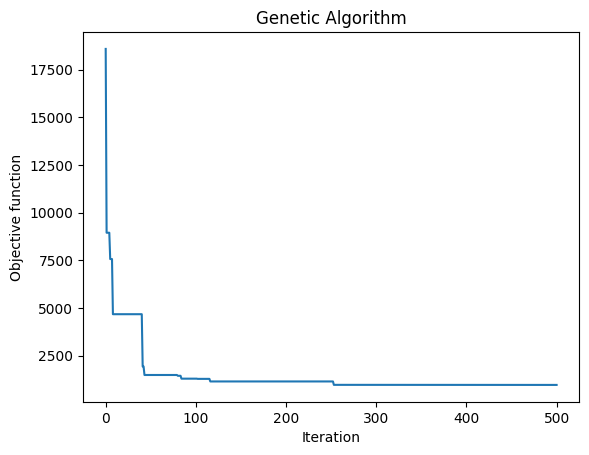

 The best solution found:                                                                           
 [-9.89690287e-04  9.36679714e-05 -8.54419683e-05]

 Objective function:
 1023.3036504847602


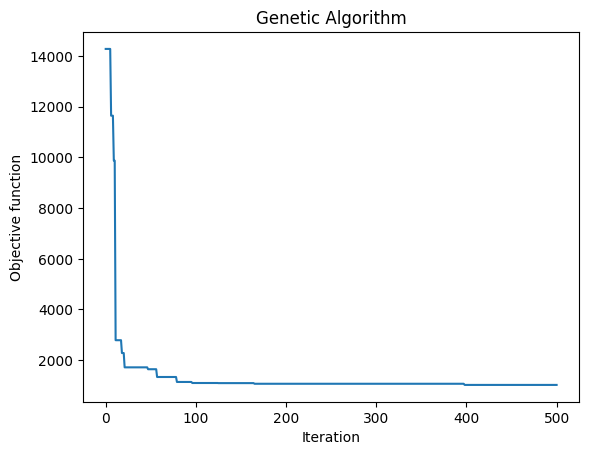

 The best solution found:                                                                           
 [-9.95266818e-04  9.50029712e-05 -8.66829834e-05]

 Objective function:
 1010.3068370385688


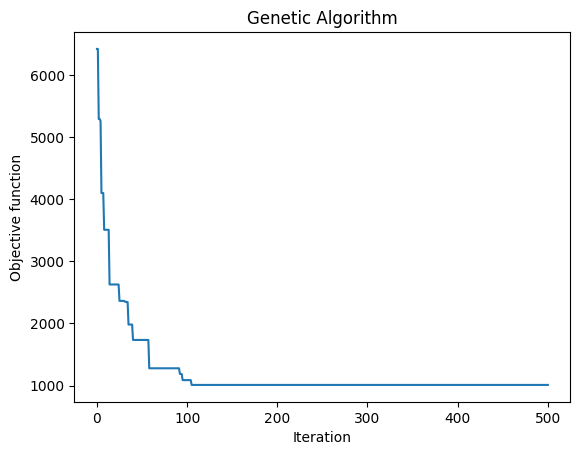

 The best solution found:                                                                           
 [-9.66204062e-04 -9.94349743e-05  9.34116198e-05]

 Objective function:
 1141.0663047293654


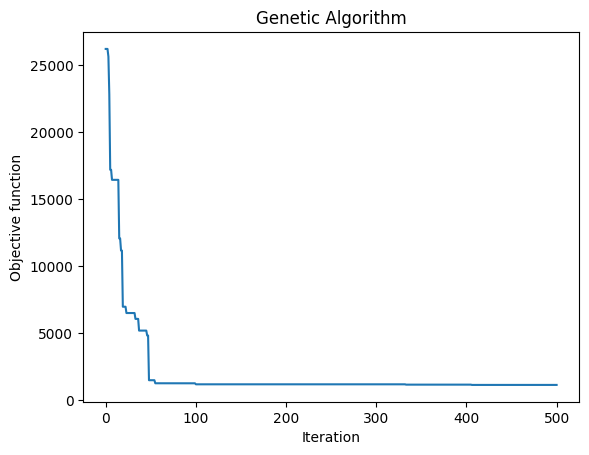

 The best solution found:                                                                           
 [-9.97233688e-04  9.24586948e-05 -8.49061660e-05]

 Objective function:
 988.406946227587


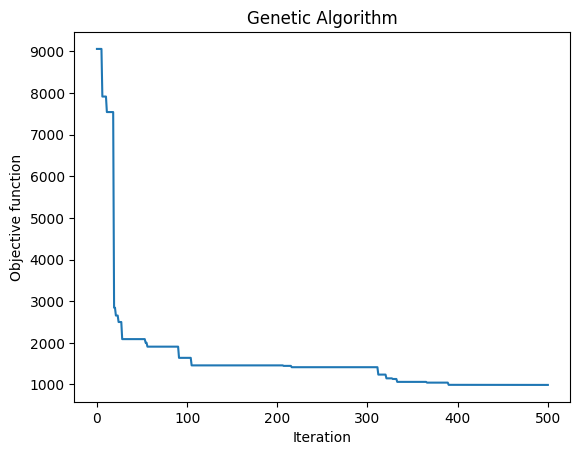

 The best solution found:                                                                           
 [-9.98410629e-04  9.90979064e-05  9.03370209e-05]

 Objective function:
 1028.7439521569295


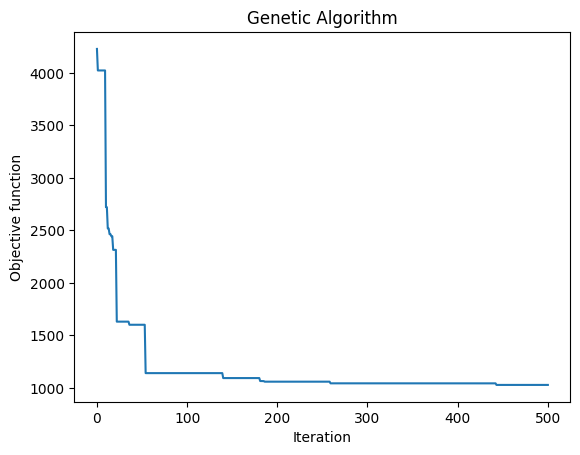

 The best solution found:                                                                           
 [-9.99657939e-04  9.17459283e-05 -8.43708052e-05]

 Objective function:
 1032.9047716931245


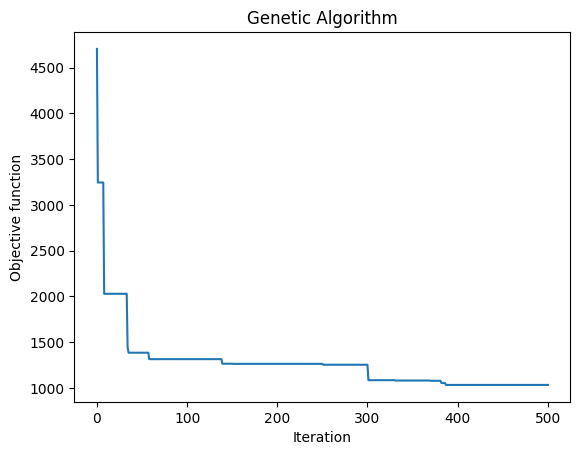

 The best solution found:                                                                           
 [-9.93937043e-04 -9.69410320e-05  9.11801139e-05]

 Objective function:
 1035.6079748403906


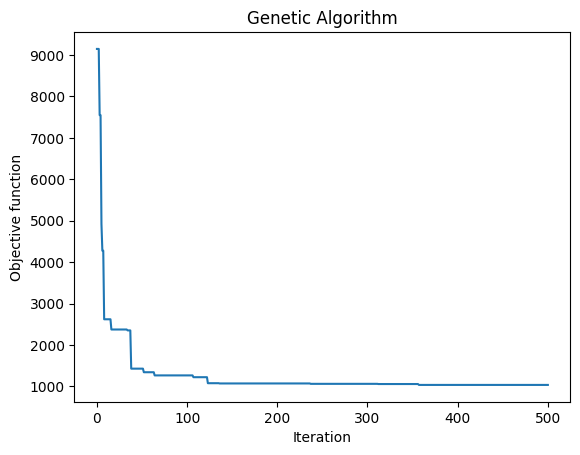

 The best solution found:                                                                           
 [-9.98227385e-04  9.30641991e-05 -8.51284769e-05]

 Objective function:
 965.9655731115199


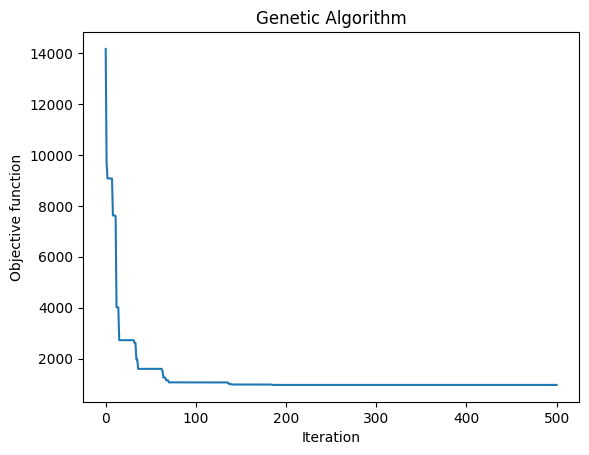

 The best solution found:                                                                           
 [-9.91181586e-04 -9.92036693e-05  9.23886573e-05]

 Objective function:
 1008.7899271024465


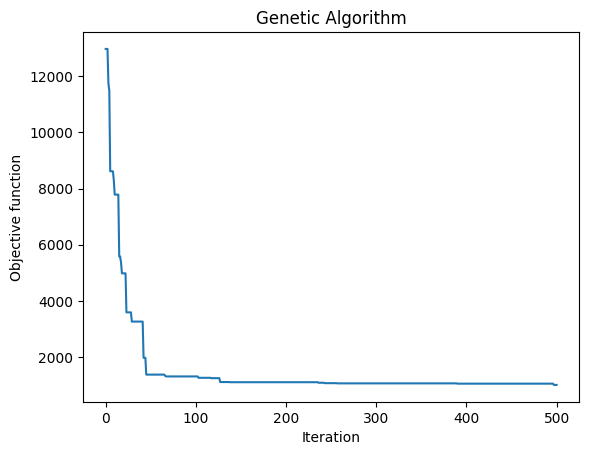

 The best solution found:                                                                           
 [-9.99397741e-04  9.32036546e-05 -8.53277910e-05]

 Objective function:
 954.9037840672561


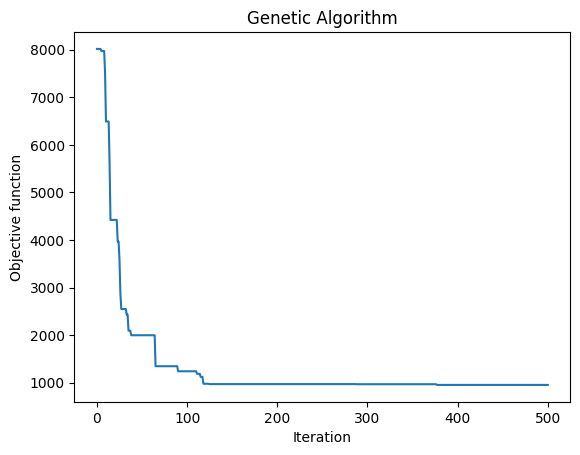

 The best solution found:                                                                           
 [-2.95080732e-04 -5.29545416e-06  1.64347665e-06]

 Objective function:
 150.4842456130757


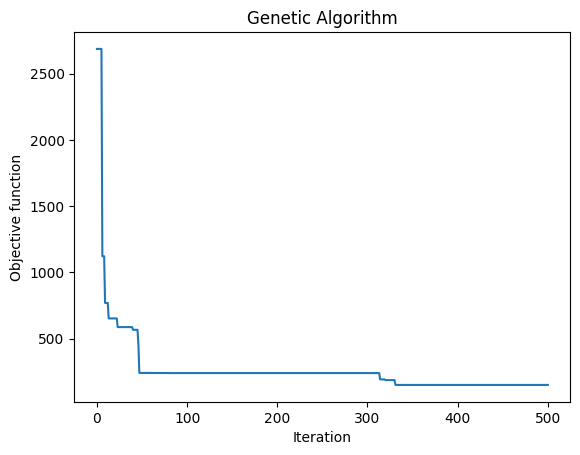

 The best solution found:                                                                           
 [-9.59008467e-04  1.68701447e-05 -4.57674791e-08]

 Objective function:
 1.3266893266244335


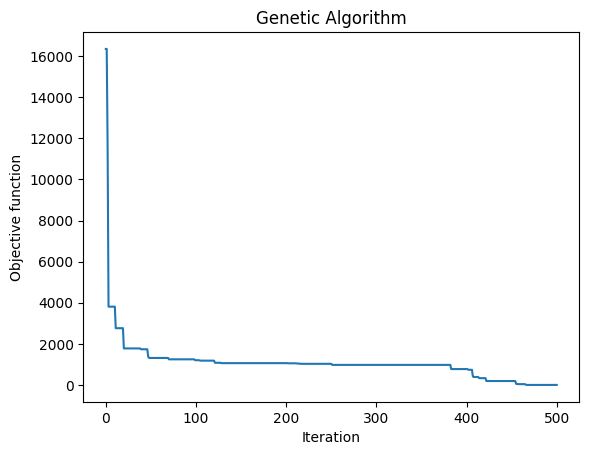

 The best solution found:                                                                           
 [-9.97513736e-04  9.16725799e-05 -8.42426556e-05]

 Objective function:
 1050.2270182220452


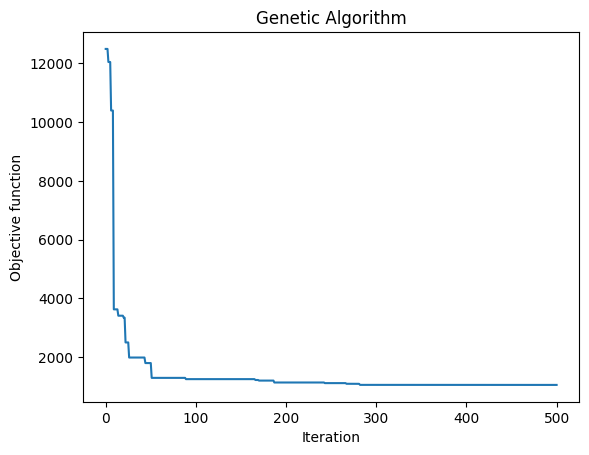

 The best solution found:                                                                           
 [-9.98333210e-04 -9.98680930e-05  9.32438509e-05]

 Objective function:
 926.7859624115199


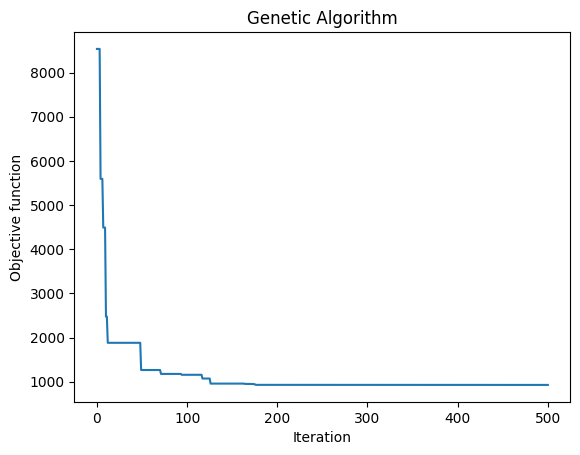

 The best solution found:                                                                           
 [-9.98306022e-04 -9.80159247e-05  9.21162408e-05]

 Objective function:
 977.1755393699395


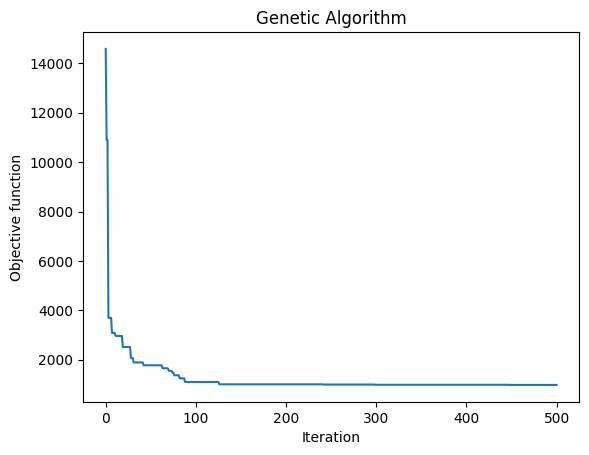

 The best solution found:                                                                           
 [-9.83866723e-04  1.71305162e-05  3.55497847e-09]

 Objective function:
 0.07755077829849372


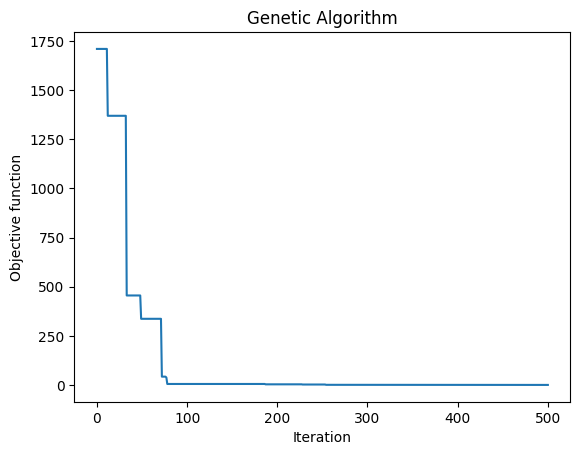

 The best solution found:                                                                           
 [-9.99266230e-04  9.37655049e-05 -8.56986318e-05]

 Objective function:
 955.1766330090701


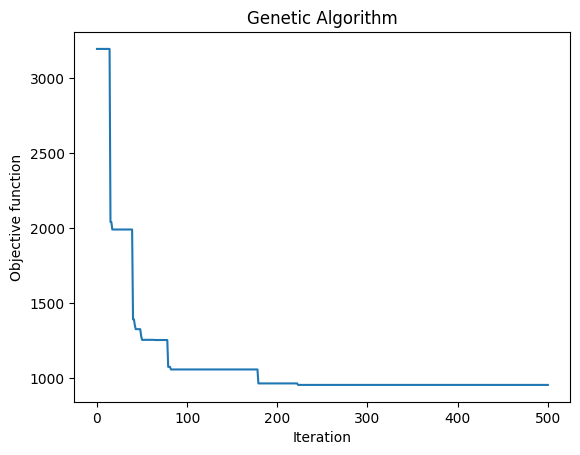

In [4]:
varbound=np.array([[- 0.001,  0.001],
                   [-0.0001, 0.0001],
                   [-0.0001, 0.0001]])

size = [i * 5 for i in range(1,11) for _ in range(2)]
print(size)
O = []

for s in size:
    algorithm_param = {'max_num_iteration': 500,\
                   'population_size':s,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

    model=ga(function=Analysis.find_strain_and_curvature,
            dimension=3,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param)

    model.run()
    O.append(model.report[-1])

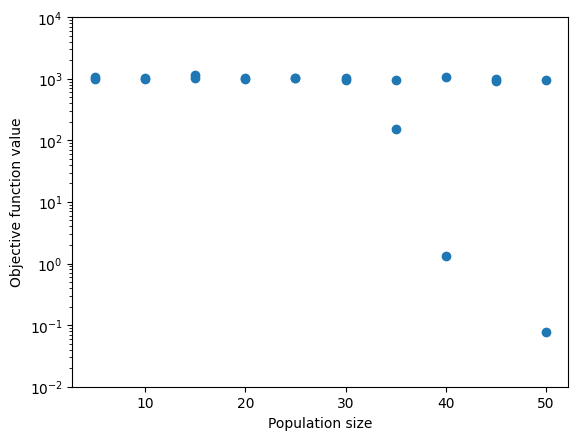

In [5]:
plt.scatter(size, O)
plt.ylim(0.01, 10000)
plt.xlabel('Population size')
plt.ylabel('Objective function value')
plt.yscale('log')
plt.show()